<a href="https://colab.research.google.com/github/tingyenhsu/2017_demonews/blob/master/1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **目的**
使用sklearn內建的iris資料集，大概跑過一次機器學習的流程


In [ ]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
ds = datasets.load_iris()

In [ ]:
# 資料集說明
print(ds.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
import pandas as pd
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = ds.target

In [ ]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# **資料清理、探索與分析**
- 針對每個變數進行分析
- 檢查相關性
- 各類別資料筆數進行統計


In [ ]:
# 觀察資料集匯總資訊
df.info()
# 給出總筆數
# 每個column非空白的筆數、data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
# 觀察每一欄位的描述統計量
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

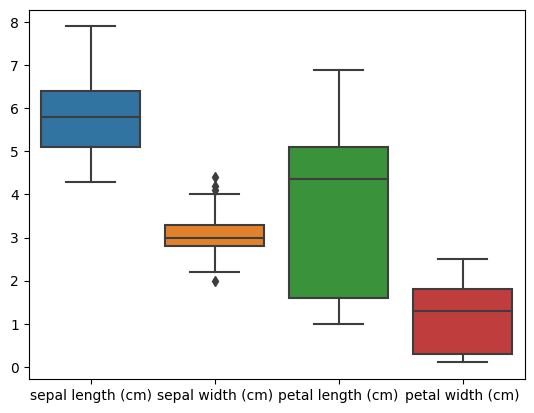

In [ ]:
# 使用box-plot觀察資料分布
import seaborn as sns
sns.boxplot(data=df)

In [ ]:
# 觀察每一欄位是否有遺失值 (之前從describe()就可以觀察到了)
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<Axes: ylabel='count'>

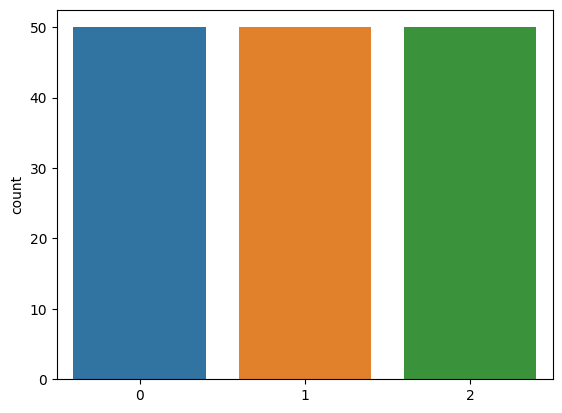

In [ ]:
# 觀察目標變數Y，觀察各類別的資料筆數是否失衡，若失衡，必須做特別的處理，以免造成模型失準或誤導預測結果
sns.countplot(x=y)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 也可以用pandas的函數去統計
pd.Series(y).value_counts()

0    50
1    50
2    50
dtype: int64

# **特徵工程**
- 不需要進行，因為sklearn內建的資料集已經很乾淨了

# **資料分割**
- 分成training data與test data(10~30%)
- train-test-split會預設打亂資料(shuffle)再切割，所以每次分割的結果均不同

In [ ]:
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# **特徵縮放**
- 將所有特徵規模一致化，避免因為數值單位不同，造成每個欄位對模型預測的評估不一致
- 希望測試資料不要參與特徵縮放的訓練，維持模型評分的公正性
- The fit_transform method does two things: it calculates the **mean** and **standard deviation** of your data (during the fit step), and then uses these values to standardize the data (during the transform step). The result scaled_data will be a new array where each feature is standardized.


In [ ]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train) #只拿X_train來做特徵縮放的訓練(標準化)
X_test_std = scaler.transform(X_test) #只做特徵縮放

# **選擇演算法**
- 用羅吉斯回歸

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
# 模型訓練
clf.fit(X_train_std, y_train)

LogisticRegression()

In [ ]:
# 模型計分
y_pred = clf.predict(X_test_std)
y_pred

array([0, 2, 1, 2, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1,
       0, 0, 0, 0, 0, 2, 0, 2])

In [ ]:
# 計算準確率
accuracy = accuracy_score(y_test, y_pred) * 100
formatted_accuracy = "{:.2f}%".format(accuracy)
print(formatted_accuracy)

100.00%


In [ ]:
# 使用混淆矩陣觀察
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]


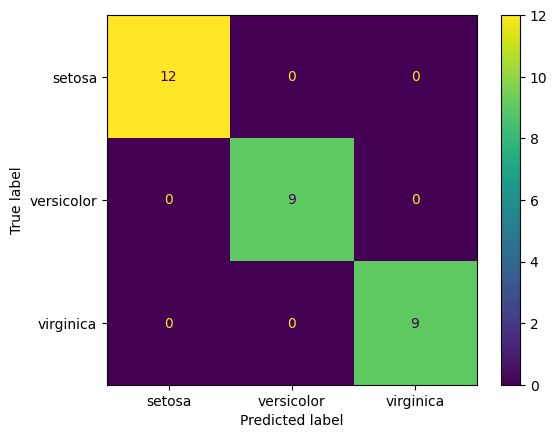

In [ ]:
# 使用混淆矩陣圖觀察
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)
, display_labels = ds.target_names)

disp.plot()
plt.show()

# **模型評估**
- 使用其他演算法或不同參數組合，訓練多個模型

# **模型部署**
- 找到最佳模型後，就可以把模型複製到正式環境中，設計使用者介面
- 特徵縮放的轉換公式也要一併儲存，否則使用者輸入的資料就不能按一致的規則轉換

In [ ]:
# 模型存檔
# joblib可以儲存任何變數
import joblib

joblib.dump(clf, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

# **模型預測**
- 使用Streamlit套件撰寫網頁程式
- 須在local端執行

In [ ]:
pip install streamlit

In [ ]:
import streamlit as st
import joblib

In [ ]:
clf = joblib.load('model.joblib')
scaler = joblib.load('scaler.joblib')

In [ ]:
st.title('Iris Model Test')
sepal_length = st.slider('sepal length:', min_value=3.0, max_value=8.0, value=5.8)
sepal_width = st.slider('sepal width:', min_value=2.0, max_value=5.0, value=3.5)
petal_length = st.slider('petal length:', min_value=1.0, max_value=7.0, value=4.4)
petal_width = st.slider('petal width:', min_value=0.1, max_value=2.5, value=1.3)

In [ ]:
labels = ['setosa','versicolor','virginica']

In [ ]:
if st.button('Predict'):
  X_new = [[sepal_length, sepal_width, petal_length, petal_width]]
  X_new = scaler.transform(X_new)
  st.write('### Predict category:', labels[clf.predict(X_new)[0]])